# Veress Needle Regression
# Pre-process distance images and labels

Map each image to a labeled distance in the Excel file

In [1]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from __future__ import print_function
import os, sys
import re
import time

## Distance labels 

In [2]:
path2data = "/home/jreynolds/21summer/veress/regression/data/"
images_dir = "distance_images/"
labels_dir = "distance_labels_20210803/"

path2images = path2data+images_dir
path2labels = path2data+labels_dir

labels_version = "20210803"

## Import labels

### read the excel files

In [3]:
vid_list=[1,2,3,4,5,6,7,8]
dist_list=[0.4, 0.6, 0.8, 1.0, 1.2]

#all_excel_files = []
lookup_label = {}
for vid in vid_list:
    pathX=path2labels+"V"+str(vid)+"_distance_measurement_"+labels_version+".xlsx"
    book = pd.read_excel(pathX, engine='openpyxl', sheet_name=None, header=None, names=['pixels', 'distance'])
    temp_dict = {}
    for d in dist_list:
        sheet_name='V'+str(vid)+'_'+str(d)
        this_sheet = book[sheet_name]
        temp_dict[str(d)] = this_sheet
        #print("sheet: "+str(sheet_name))
        #print(this_sheet)
    lookup_label[str(vid)] = temp_dict
    #print("lookup_label["+str(vid)+"] = "+str(lookup_label[str(vid)]))
print("Imported "+str(len(lookup_label))+" xlsx files")
print("\nNumber of subjects: "+str(len(lookup_label)))
print("Distances: "+ str(list(lookup_label['1'].keys())))
print("Number of labels per subject per distance category: "+str(len(lookup_label['1'][str(dist_list[0])])))
#print("teeeeempie: ", type(lookup_label['1'][str(dist_list[0])]))

Imported 8 xlsx files

Number of subjects: 8
Distances: ['0.4', '0.6', '0.8', '1.0', '1.2']
Number of labels per subject per distance category: 200


### sample excel sheet

In [4]:
lookup_label['1']['0.4']

,pixels,distance
0,45,281.25
1,46,287.50
2,47,293.75
3,45,281.25
4,46,287.50
...,...,...
195,94,587.50
196,98,612.50
197,94,587.50
198,98,612.50


### list the directories of the images

In [5]:
dirs = os.listdir(path2images)
dirs

['V8_0.8mm',
 'V3_0.8mm',
 'V5_1.0mm',
 'V5_0.4mm',
 'V2_0.8mm',
 'V1_0.4mm',
 'V7_1.2mm',
 'V6_1.0mm',
 'V6_0.6mm',
 'V7_0.6mm',
 'V6_0.4mm',
 'V6_1.2mm',
 'V5_1.2mm',
 'V8_1.0mm',
 'V3_1.0mm',
 'V8_0.4mm',
 'V4_0.6mm',
 'V3_0.4mm',
 'V4_0.4mm',
 'V1_0.8mm',
 'V2_1.2mm',
 'V4_0.8mm',
 'V1_1.0mm',
 'V4_1.0mm',
 'V3_1.2mm',
 'V5_0.6mm',
 'V2_1.0mm',
 'V7_0.8mm',
 'V6_0.8mm',
 'V7_0.4mm',
 'V1_1.2mm',
 'V2_0.4mm',
 'V8_0.6mm',
 'V2_0.6mm',
 'V8_1.2mm',
 'V3_0.6mm',
 'V1_0.6mm',
 'V4_1.2mm',
 'Cropped_Veress Needle Data.zip',
 'V5_0.8mm',
 'V7_1.0mm']

### list the full paths to the image files 

In [6]:
# get a list of full paths to the image data
subdir_list=[]
count=0
for subdir in dirs:
    if re.match(r'V\d_\d.\d', subdir):
        #print(subdir)
        subdir_list.append(path2images+str(subdir)+"/")
        print(subdir_list[count])
        count+=1 

/home/jreynolds/21summer/veress/regression/data/distance_images/V8_0.8mm/
/home/jreynolds/21summer/veress/regression/data/distance_images/V3_0.8mm/
/home/jreynolds/21summer/veress/regression/data/distance_images/V5_1.0mm/
/home/jreynolds/21summer/veress/regression/data/distance_images/V5_0.4mm/
/home/jreynolds/21summer/veress/regression/data/distance_images/V2_0.8mm/
/home/jreynolds/21summer/veress/regression/data/distance_images/V1_0.4mm/
/home/jreynolds/21summer/veress/regression/data/distance_images/V7_1.2mm/
/home/jreynolds/21summer/veress/regression/data/distance_images/V6_1.0mm/
/home/jreynolds/21summer/veress/regression/data/distance_images/V6_0.6mm/
/home/jreynolds/21summer/veress/regression/data/distance_images/V7_0.6mm/
/home/jreynolds/21summer/veress/regression/data/distance_images/V6_0.4mm/
/home/jreynolds/21summer/veress/regression/data/distance_images/V6_1.2mm/
/home/jreynolds/21summer/veress/regression/data/distance_images/V5_1.2mm/
/home/jreynolds/21summer/veress/regres

### display sample image

/home/jreynolds/21summer/veress/regression/data/distance_images/V8_0.8mm/1_V8_0.8.png


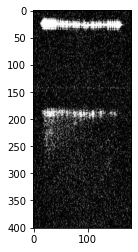

In [7]:
temp_path=subdir_list[0]+'1_V8_0.8.png'
print(temp_path)
img = mpimg.imread(temp_path, format = "png") 
plt.imshow(img) 

# map images to labels 

In [8]:
MasterDict={}
count =0
start=time.time()
for path in subdir_list:
    file_dir_temp = os.listdir(path)
    for img_name in file_dir_temp:
        # read the image with matplotlib mpimg
        path_img=path+"/"+img_name
        img = mpimg.imread(path_img, format = "png")
        # use regex to extract info about the current file
        my_img_number = re.search(r'\d{1,3}(?=_V[0-9]+)', str(img_name))
        my_vid = re.search(r'(?<=V)\d', str(img_name))
        my_dist = re.search(r'\d.\d(?=.png)', str(img_name))
        img_details = (int(my_vid.group(0)), str(my_dist.group(0)), int(my_img_number.group(0)))
        # loop through labels for the eight subjects (excel files)
        found_flag=False
        tempList=[]
        for i in lookup_label:
            # find the matching subject ID
            if str(img_details[0]) == str(i) and found_flag==False:
                # for the given subject, loop through the five distance tables (excel files)
                for j in lookup_label[i]:
                    # find the matching excel sheet name
                    if str(img_details[1])==str(j) and found_flag==False:
                        # for the given subject (i) and distance (j), loop through the 200 distance labels (excel files) 
                        store_idx=[]
                        for idx, row in lookup_label[i][j].iterrows():
                            store_idx.append(idx)
                            # find the matching image index
                            if str(img_details[2]) == str(idx+1) and found_flag==False:
                                MasterDict[str(img_name)]=(img_details[0], img_details[1], img_details[2], float(row['distance']), img)
                                count += 1
                                found_flag = True
        percentComplete=int((count/8000)*100)
        print(str(count)+" images processed; "+str(percentComplete)+"% percent complete", end='\r')
        sys.stdout.flush()
end = time.time()
print("Time taken to read "+str(len(MasterDict)), " images is ", str(end - start), "s")

Time taken to read 8000  images is  58.59107494354248 s


In [9]:
print("number of images: "+str(len(MasterDict)))

number of images: 8000


## display image from data frame (dict)

ground_truth: 425.0 µm


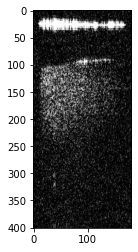

In [10]:
temp_str='1_V3_0.4.png'
plt.imshow(MasterDict[temp_str][4])
print("ground_truth: "+str(MasterDict[temp_str][3])+" µm")

In [11]:
for i in MasterDict:
    print("vid="+str(MasterDict[i][0])+", group="+str(MasterDict[i][1])+", idx="+str(MasterDict[i][2])+", label="+str(MasterDict[i][3]))

vid=8, group=0.8, idx=86, label=918.75
vid=8, group=0.8, idx=183, label=956.25
vid=8, group=0.8, idx=122, label=906.25
vid=8, group=0.8, idx=77, label=925.0
vid=8, group=0.8, idx=98, label=900.0
vid=8, group=0.8, idx=100, label=912.5
vid=8, group=0.8, idx=124, label=912.5
vid=8, group=0.8, idx=178, label=943.75
vid=8, group=0.8, idx=141, label=925.0
vid=8, group=0.8, idx=125, label=906.25
vid=8, group=0.8, idx=127, label=906.25
vid=8, group=0.8, idx=113, label=900.0
vid=8, group=0.8, idx=71, label=912.5
vid=8, group=0.8, idx=144, label=918.75
vid=8, group=0.8, idx=174, label=925.0
vid=8, group=0.8, idx=180, label=918.75
vid=8, group=0.8, idx=1, label=968.75
vid=8, group=0.8, idx=111, label=906.25
vid=8, group=0.8, idx=186, label=943.75
vid=8, group=0.8, idx=120, label=918.75
vid=8, group=0.8, idx=190, label=943.75
vid=8, group=0.8, idx=50, label=950.0
vid=8, group=0.8, idx=167, label=937.5
vid=8, group=0.8, idx=17, label=975.0
vid=8, group=0.8, idx=140, label=912.5
vid=8, group=0.8, id

In [12]:
MasterDict['1_V1_0.4.png'][4].shape

(401, 181, 3)

In [13]:
_filename_list, _vid_list, _distgroup_list, _idx_list, _label_list, _img_list = [],[],[],[],[],[]
for i in MasterDict:
    print(i)
    print("[i][0]", type(MasterDict[i][0]), MasterDict[i][0])
    print("[i][1]", type(MasterDict[i][1]), MasterDict[i][1])
    print("[i][2]", type(MasterDict[i][2]), MasterDict[i][2])
    print("[i][3]", type(MasterDict[i][3]), MasterDict[i][3])
    _filename_list.append(i)
    _vid_list.append(MasterDict[i][0])
    _distgroup_list.append(MasterDict[i][1])
    _idx_list.append(MasterDict[i][2])
    _label_list.append(MasterDict[i][3])
    _img_list.append(MasterDict[i][4])

86_V8_0.8.png
[i][0] <class 'int'> 8
[i][1] <class 'str'> 0.8
[i][2] <class 'int'> 86
[i][3] <class 'float'> 918.75
183_V8_0.8.png
[i][0] <class 'int'> 8
[i][1] <class 'str'> 0.8
[i][2] <class 'int'> 183
[i][3] <class 'float'> 956.25
122_V8_0.8.png
[i][0] <class 'int'> 8
[i][1] <class 'str'> 0.8
[i][2] <class 'int'> 122
[i][3] <class 'float'> 906.25
77_V8_0.8.png
[i][0] <class 'int'> 8
[i][1] <class 'str'> 0.8
[i][2] <class 'int'> 77
[i][3] <class 'float'> 925.0
98_V8_0.8.png
[i][0] <class 'int'> 8
[i][1] <class 'str'> 0.8
[i][2] <class 'int'> 98
[i][3] <class 'float'> 900.0
100_V8_0.8.png
[i][0] <class 'int'> 8
[i][1] <class 'str'> 0.8
[i][2] <class 'int'> 100
[i][3] <class 'float'> 912.5
124_V8_0.8.png
[i][0] <class 'int'> 8
[i][1] <class 'str'> 0.8
[i][2] <class 'int'> 124
[i][3] <class 'float'> 912.5
178_V8_0.8.png
[i][0] <class 'int'> 8
[i][1] <class 'str'> 0.8
[i][2] <class 'int'> 178
[i][3] <class 'float'> 943.75
141_V8_0.8.png
[i][0] <class 'int'> 8
[i][1] <class 'str'> 0.8
[i]

## remove last channel in the images

In [14]:
_img_1D_list=[image[:,:,0] for image in _img_list]

In [15]:
_filename = np.array(_filename_list)
_vid = np.array(_vid_list)
_distgroup = np.array(_distgroup_list)
_idx = np.array(_idx_list)
_label = np.array(_label_list)
_img = np.array(_img_1D_list)

# Export numpy
- file_names
- vid
- approx_dist
- idx
- labels
- images

In [16]:
export_dir=path2data+'export_preprocess_20210803/'

exp_filename='filenames_20210803.npy'
exp_vid='vid_20210803.npy'
exp_approxdist='distgroup_20210803.npy'
exp_idx='idx_20210803.npy'
exp_labels='labels_20210803.npy'
exp_images='images_20210803.npy'

with open(export_dir+exp_filename, 'wb') as f:
    np.save(f, _filename)
with open(export_dir+exp_vid, 'wb') as f:
    np.save(f, _vid)
with open(export_dir+exp_approxdist, 'wb') as f:
    np.save(f, _distgroup)
with open(export_dir+exp_idx, 'wb') as f:
    np.save(f, _idx)
with open(export_dir+exp_labels, 'wb') as f:
    np.save(f, _label)
with open(export_dir+exp_images, 'wb') as f:
    np.save(f, _img)